first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

To split the available dataset for testing and training, I'll use the train_test_split method. To scale the features, I am using StandardScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

I'll import all the Machine Learning algorithms that  I will be using.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

importing dataset

In [4]:
dataset = pd.read_csv('F://Data sets//Heart_Disease_Prediction.csv')

I'll just take a glimpse of the data using the desribe() and info() methods before I actually start processing and visualizing it.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Understanding data

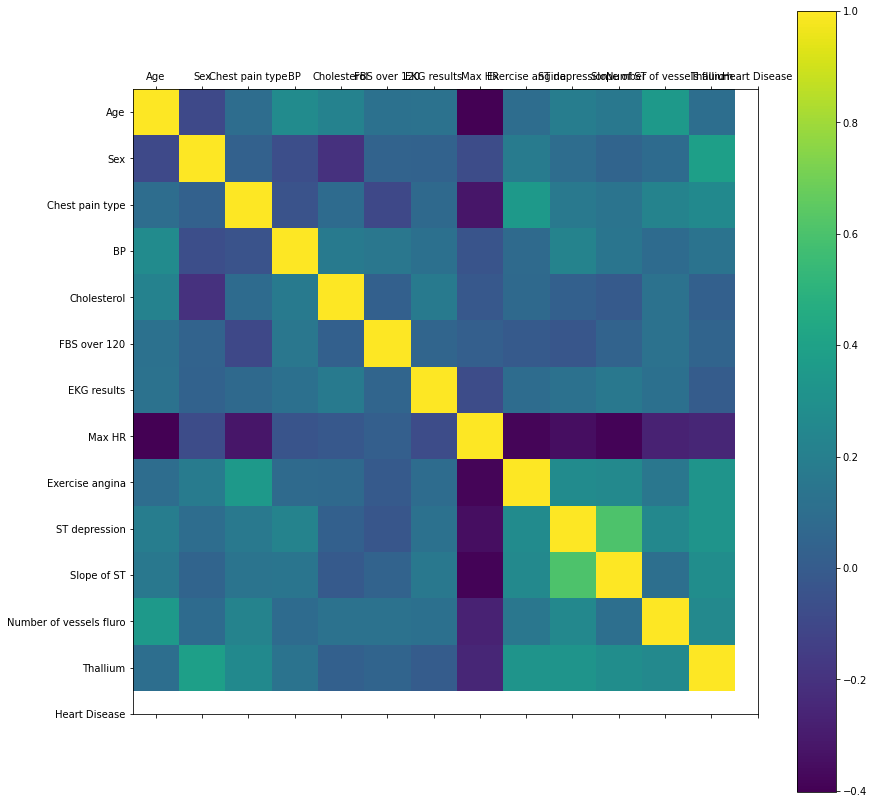

In [7]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

I'll take a look at the histograms for each variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A25970400>,
      dtype=object)

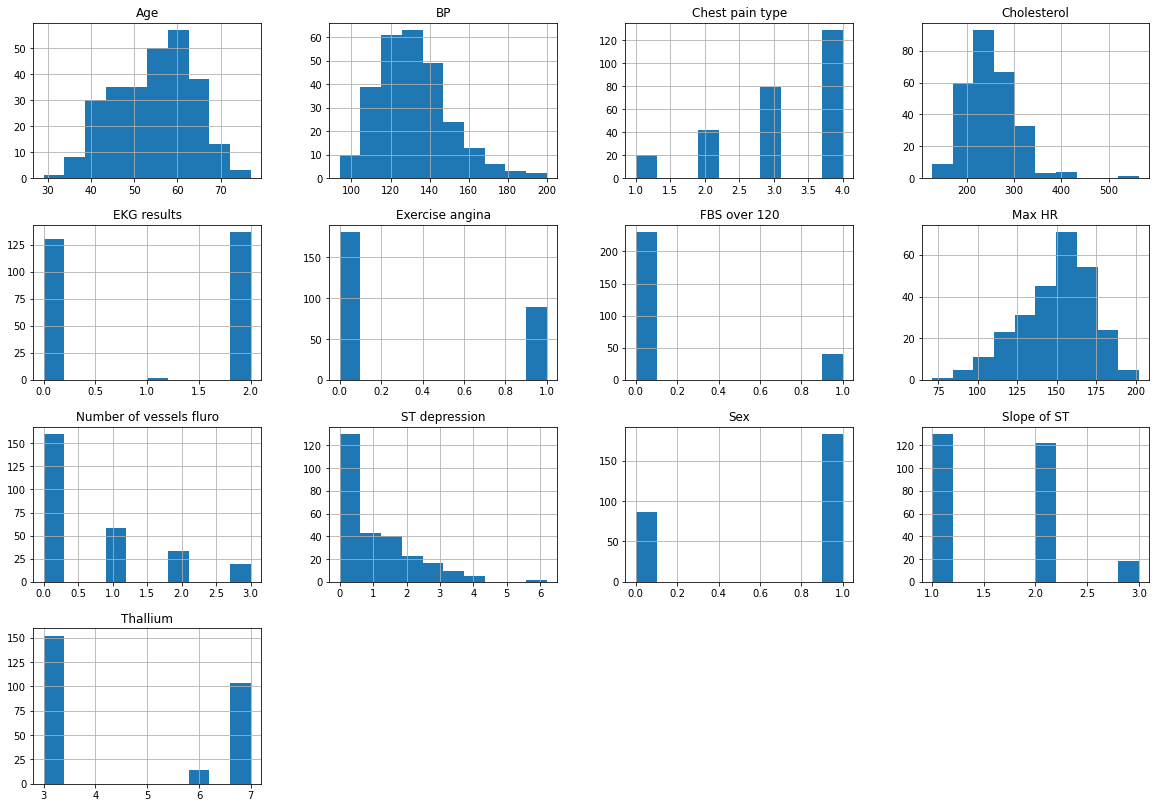

In [8]:
dataset.hist()

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

Text(0.5, 1.0, 'Count of each Target Class')

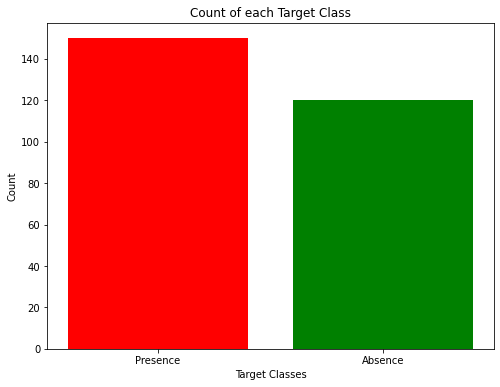

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['Heart Disease'].unique(), dataset['Heart Disease'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

Data Processing

In [10]:
dataset = pd.get_dummies(dataset, columns = ['Sex','Chest pain type','FBS over 120','EKG results','Exercise angina','Slope of ST','Number of vessels fluro','Thallium'])

In [11]:
standardScaler = StandardScaler()
columns_to_scale = ['Age', 'BP', 'Cholesterol','Max HR',]
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

train_test_split to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [12]:
y = dataset['Heart Disease']
X = dataset.drop(['Heart Disease'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

K Neighbors Classifier

In [13]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

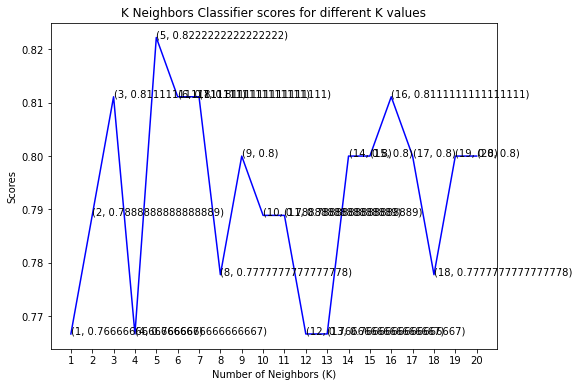

In [14]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'Blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was 0.82 for the 5 neighbors.

In [15]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[8]*100, 5))

The score for K Neighbors Classifier is 80.0% with 5 nieghbors.


Support Vector Classifier

In [16]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

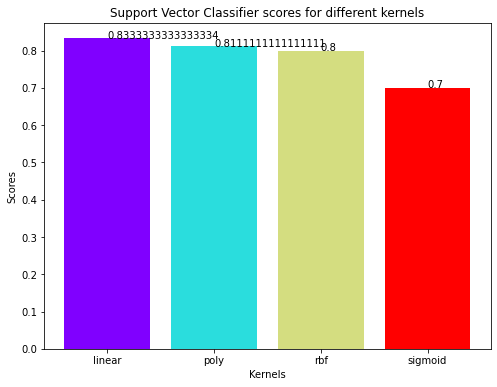

In [17]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The linear kernel performed the best, being slightly better than rbf kernel.

In [18]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 83.33333333333334% with linear kernel.


Decision Tree Classifier

In [19]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

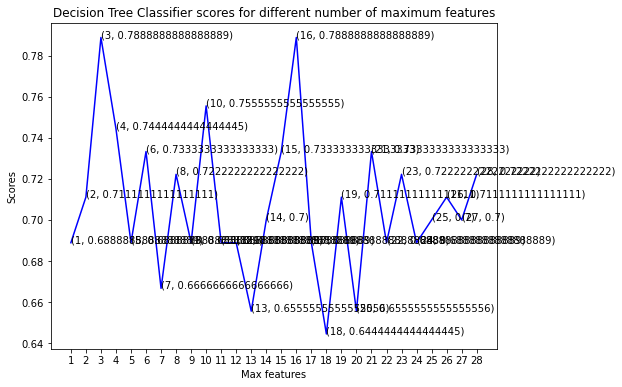

In [20]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'Blue')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [21]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [3,16]))

The score for Decision Tree Classifier is 64.44444444444444% with [3, 16] maximum features.


Random Forest Classifier

In [22]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

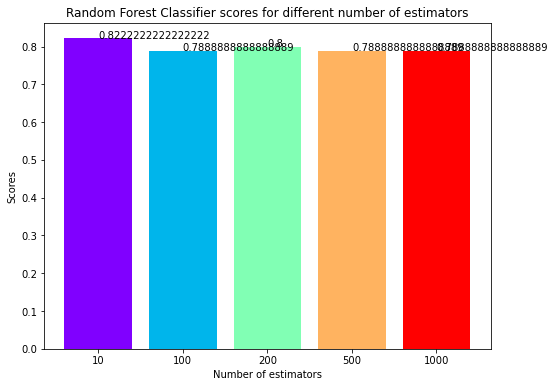

In [23]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [24]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [10]))

The score for Random Forest Classifier is 78.88888888888889% with [10] estimators.
